In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Charger ton dataset
df = pd.read_csv("geo_safety_data.csv")

# Supprimer les colonnes inutiles
df.drop(columns=['jour', 'mois', 'LOCATION'], inplace=True)

# Filtrer les lignes avec une heure valide
df = df[(df['heure'] >= 0) & (df['heure'] <= 23)]

X = df[['Vict Age', 'Vict Sex', 'heure', 'LAT', 'LON']]
y = df['danger']

# Encoder la variable 'Vict Sex' en numérique
X['Vict Sex'] = X['Vict Sex'].map({'M': 1, 'F': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\info tech\AppData\Local\Temp\ipykernel_8768\3084613574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vict Sex'] = X['Vict Sex'].map({'M': 1, 'F': 0})


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))


Accuracy (Random Forest): 0.954954954954955


In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion :\n", cm)


Matrice de confusion :
 [[ 85   6]
 [  4 127]]


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94        91
           1       0.95      0.97      0.96       131

    accuracy                           0.95       222
   macro avg       0.95      0.95      0.95       222
weighted avg       0.95      0.95      0.95       222



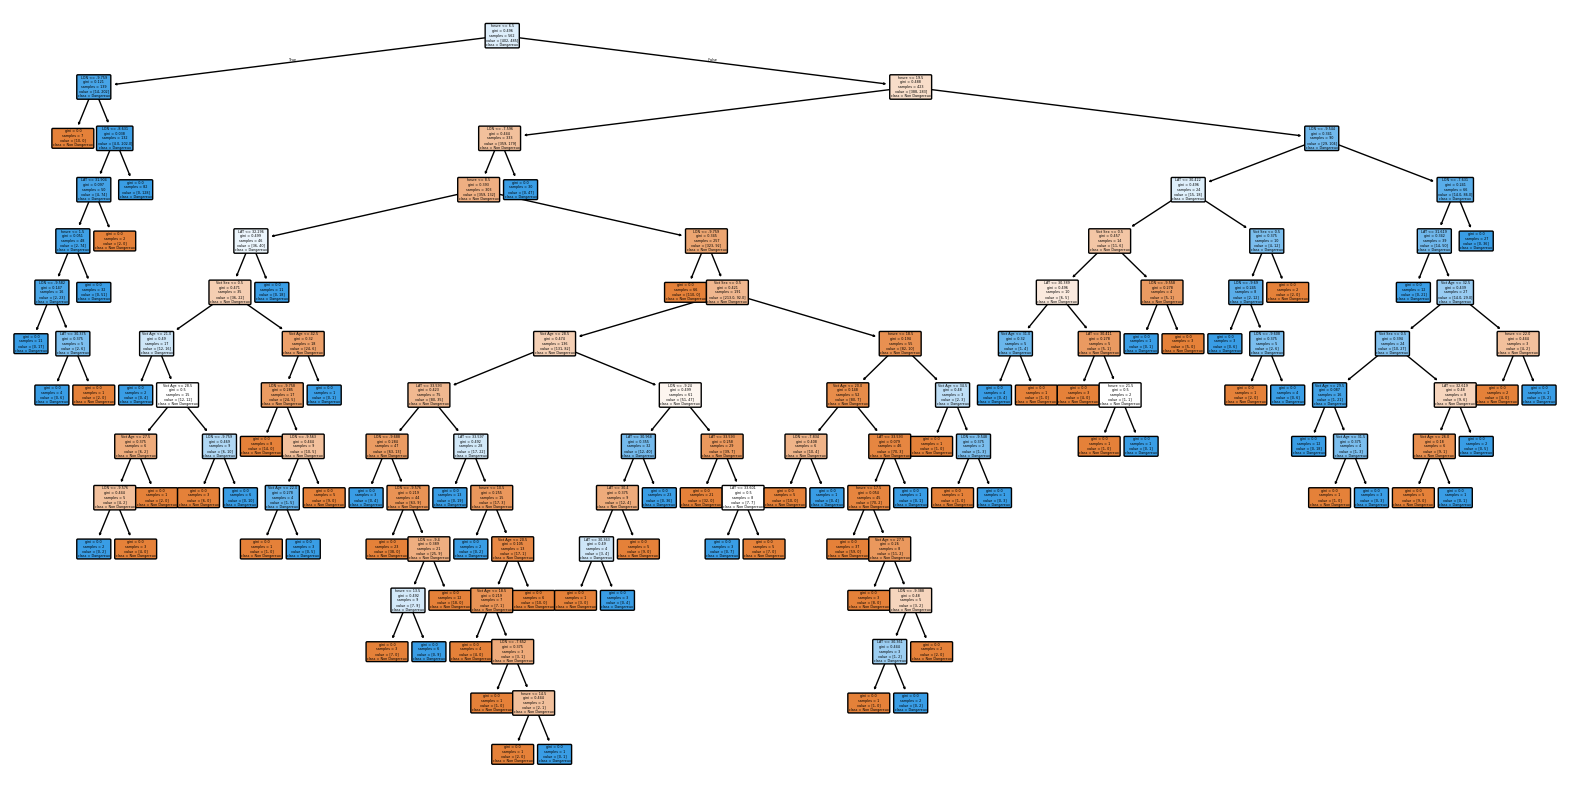

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choisir un arbre parmi ceux de ta forêt (par exemple le premier)
estimator = model_rf.estimators_[0]

# Afficher l'arbre
plt.figure(figsize=(20,10))  # (Largeur, Hauteur) de l'image
plot_tree(estimator, 
          feature_names=['Vict Age', 'Vict Sex', 'heure', 'LAT', 'LON'], 
          class_names=['Non Dangereux', 'Dangereux'], 
          filled=True, 
          rounded=True)
plt.show()


In [26]:
import pandas as pd

# Nouvelles données (25, 0(F), 23, 32.32329981047794, -9.260393664963635)
new_data = pd.DataFrame({
    'Vict Age': [30],
    'Vict Sex': [1],  # 0 pour femme, 1 pour homme (en fonction de ton encodage)
    'heure': [10],
    'LAT': [32.32329981047794],
    'LON': [-9.260393664963635]
})

# Prédire avec le modèle Random Forest
prediction = model_rf.predict(new_data)

# Afficher la prédiction
print("Prédiction (0 = Non dangereux, 1 = Dangereux) :", prediction[0])


Prédiction (0 = Non dangereux, 1 = Dangereux) : 0


In [46]:
import pandas as pd

# Nouvelles données (25, 0(F), 23, 32.32329981047794, -9.260393664963635)
new_data = pd.DataFrame({
    'Vict Age': [40],
    'Vict Sex': [0],  # 0 pour femme, 1 pour homme (en fonction de ton encodage)
    'heure': [10],
    'LAT': [32.32341763625289],
    'LON': [-9.262292709395014]
})

# Prédire avec le modèle Random Forest
prediction = model_rf.predict(new_data)

# Afficher la prédiction
print("Prédiction (0 = Non dangereux, 1 = Dangereux) :", prediction[0])


Prédiction (0 = Non dangereux, 1 = Dangereux) : 1


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Si tu as utilisé un scaler pour les données

# Exemple de transformation (si tu as fait une normalisation ou standardisation)
# Appliquer la même normalisation que pour les données d'entraînement (si nécessaire)
# Si tu as utilisé un StandardScaler par exemple :
scaler = StandardScaler()
# Assure-toi de faire la même transformation sur les nouvelles données qu'avec celles d'entraînement
# scaler.fit(X_train)  # Entraîne le scaler avec les données d'entraînement si tu ne l'as pas fait avant
# new_data_scaled = scaler.transform(new_data)  # Applique la transformation

# Nouvelles données (30, 1(M), 10, 32.32329981047794, -9.260393664963635)
new_data = pd.DataFrame({
    'Vict Age': [25],
    'Vict Sex': [1],  # 0 pour femme, 1 pour homme (selon ton encodage)
    'heure': [9],
    'LAT': [32.32414297648303],
    'LON': [-9.26251797447225]
})


# Si tu utilises un scaler, tu devrais appliquer la transformation ici :
# new_data = scaler.transform(new_data)

# Prédire avec le modèle Random Forest
prediction = model_rf.predict(new_data)

# Afficher la prédiction
print("Prédiction (0 = Non dangereux, 1 = Dangereux) :", prediction[0])


Prédiction (0 = Non dangereux, 1 = Dangereux) : 1
